In [1]:
import cml

vodafone_data = cml.VodafoneData()
main_roads_df = vodafone_data.read('data/Reduced') # Read the data from the folder (All Vodafone data)
vodafone_data.preprocess(main_roads_df)

print(main_roads_df.shape)
main_roads_df.head()

(13772271, 24)


Grid_ID                  Datetime         C1   C2         C3   C4     C5  \
0       16 2021-12-09 14:55:00+00:00  57.230000  0.0  57.230000  0.0   2.01   
1       16 2021-12-07 13:05:00+00:00  66.220001  0.0  54.220001  0.0  16.27   
2       16 2021-12-21 19:30:00+00:00  20.410000  0.0  20.410000  0.0   0.00   
3       16 2021-12-08 04:00:00+00:00  12.540000  0.0  11.610000  0.0   8.89   
4       16 2021-12-17 05:20:00+00:00  15.530000  0.0  15.530000  0.0  10.67   

          C6   C7    C8  ...   E1         E2           E3      E4       E5  \
0   6.620000  0.0  0.00  ...  0.0   0.000000     0.000000     0.0      0.0   
1  14.520000  0.0  0.00  ...  0.0  55.720001  1535.079956  1393.0  37445.0   
2   8.080000  0.0  0.00  ...  0.0   0.000000     0.000000     0.0      0.0   
3  17.530001  0.0  0.00  ...  0.0   0.000000     0.000000     0.0      0.0   
4  20.639999  0.0  2.59  ...  0.0   0.000000     0.000000     0.0      0.0   

     E6   E7    E8    E9  E10  
0  <NA>  0.0  4.87  12.0  0.0  
1  <NA>  0.0  6.03  22.0  0.0  
2  <NA>  0.0  6.67  16.0  0.0  
3  <NA>  0.0  3.82  12.0  0.0  
4  <NA>  0.0  1.75  10.0  0.0  

[5 rows x 24 columns]

In [2]:
columns = ['Grid_ID', 'Datetime', 'C1', 'C2', 'C11', 'E1', 'E7', 'E8', 'E9']
main_roads_df = main_roads_df[columns]
main_roads_df.head()

Grid_ID                  Datetime         C1   C2   C11   E1   E7    E8  \
0       16 2021-12-09 14:55:00+00:00  57.230000  0.0  0.00  0.0  0.0  4.87   
1       16 2021-12-07 13:05:00+00:00  66.220001  0.0  6.44  0.0  0.0  6.03   
2       16 2021-12-21 19:30:00+00:00  20.410000  0.0  0.00  0.0  0.0  6.67   
3       16 2021-12-08 04:00:00+00:00  12.540000  0.0  0.00  0.0  0.0  3.82   
4       16 2021-12-17 05:20:00+00:00  15.530000  0.0  0.00  0.0  0.0  1.75   

     E9  
0  12.0  
1  22.0  
2  16.0  
3  12.0  
4  10.0

In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np

from shapely import wkt

grids_df = pd.read_csv('data/wktComplete.csv', encoding='latin-1', index_col='grelha_id')
grids_df['geometry'] = grids_df.wkt.apply(wkt.loads)
grids_geo = gpd.GeoDataFrame(grids_df) 
grids_geo.sort_index(inplace=True)
grids_geo.set_crs(epsg=4326, inplace=True)
grids_geo.to_crs(epsg=3857, inplace=True)
grids_geo.head()

dicofre                              entity_id  \
grelha_id                                                   
1           110658  coi.tematica.grelha.lx.atributos.3518   
2           110658  coi.tematica.grelha.lx.atributos.3519   
3           110658  coi.tematica.grelha.lx.atributos.3520   
4           110658  coi.tematica.grelha.lx.atributos.3521   
5           110658  coi.tematica.grelha.lx.atributos.3522   

                                entity_type freguesia  \
grelha_id                                               
1          coi.tematica.grelha.lx.atributos     Belém   
2          coi.tematica.grelha.lx.atributos     Belém   
3          coi.tematica.grelha.lx.atributos     Belém   
4          coi.tematica.grelha.lx.atributos     Belém   
5          coi.tematica.grelha.lx.atributos     Belém   

                                            freguesias  grelha_x  grelha_y  \
grelha_id                                                                    
1          Santa Maria de Belém + São Francisco Xavier         4         1   
2          Santa Maria de Belém + São Francisco Xavier         5         1   
3          Santa Maria de Belém + São Francisco Xavier         6         1   
4          Santa Maria de Belém + São Francisco Xavier         7         1   
5          Santa Maria de Belém + São Francisco Xavier         8         1   

            latitude  longitude                       nome  objectid  \
grelha_id                                                              
1          38.692094  -9.225027  Área ribeirinha Pedrouços         1   
2          38.692094  -9.223231  Área ribeirinha Pedrouços         2   
3          38.692094  -9.221434  Área ribeirinha Pedrouços         3   
4          38.692094  -9.219637             Torre de Belém         4   
5          38.692094  -9.217841             Torre de Belém         5   

                                                    position  \
grelha_id                                                      
1          {'type': 'GeometryCollection', 'geometries': [...   
2          {'type': 'GeometryCollection', 'geometries': [...   
3          {'type': 'GeometryCollection', 'geometries': [...   
4          {'type': 'GeometryCollection', 'geometries': [...   
5          {'type': 'GeometryCollection', 'geometries': [...   

                                                         wkt  \
grelha_id                                                      
1          MULTIPOLYGON (((-9.22412591616028 38.691391736...   
2          MULTIPOLYGON (((-9.22232928559204 38.691391736...   
3          MULTIPOLYGON (((-9.2205326550238 38.6913917367...   
4          MULTIPOLYGON (((-9.21873602445556 38.691391736...   
5          MULTIPOLYGON (((-9.21693939388732 38.691391736...   

                                                    geometry  
grelha_id                                                     
1          MULTIPOLYGON (((-1026825.000 4677562.000, -102...  
2          MULTIPOLYGON (((-1026625.000 4677562.000, -102...  
3          MULTIPOLYGON (((-1026425.000 4677562.000, -102...  
4          MULTIPOLYGON (((-1026225.000 4677562.000, -102...  
5          MULTIPOLYGON (((-1026025.000 4677562.000, -102...

In [4]:
entrance_roads_girds_id = [value for values in cml.street_names.values() for value in values]
entrance_roads_df = main_roads_df[main_roads_df.Grid_ID.isin(entrance_roads_girds_id)].copy()
print(entrance_roads_df.shape)
entrance_roads_df.describe()

(1143615, 9)


Grid_ID            C1            C2           C11            E1  \
count  1.143615e+06  1.143615e+06  1.143615e+06  1.143615e+06  1.143615e+06   
mean   2.327311e+03  1.414581e+02  5.266903e+00  2.657203e+00  9.519211e-01   
std    1.369000e+03  1.376798e+02  8.616458e+00  6.789005e+00  3.872869e+00   
min    7.500000e+01  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    9.340000e+02  5.466000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
50%    2.656000e+03  1.129700e+02  2.370000e+00  0.000000e+00  0.000000e+00   
75%    3.565000e+03  1.952300e+02  6.460000e+00  2.680000e+00  0.000000e+00   
max    3.736000e+03  2.061114e+04  3.679100e+02  1.066590e+03  7.581900e+02   

                 E7            E8            E9  
count  1.143615e+06  1.143615e+06  1.143615e+06  
mean   2.856897e-01  1.171884e+01  8.037182e+01  
std    3.888710e+00  2.467898e+01  9.566682e+01  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  4.410000e+00  2.100000e+01  
50%    0.000000e+00  6.140000e+00  4.100000e+01  
75%    0.000000e+00  9.660000e+00  7.900000e+01  
max    3.000000e+02  3.000000e+02  3.000000e+02

- Maximum time of stay in grid is 300 even in E7, which can be caused by time limit.
- Number of calls in grid is mostly equal to 0, but the maximum number is very high. Same situation is with calls which were finalized in the same grid, that can happen in emergency situations. To prove it number of calls should be compared with number with C1 and E8.
- Even if value of C2 is mostly close to 0 and tourist influence to a traffic is insignificant, there are some grids with high value of C2. It can be valuable to look closure to this time periods where it occurs and find out what is the reason of high value of C2.
- Value of C1 shows average traffic at entrance roads with 150 terminals. But the maximum value is unimaginably large, which can suggest some outliers in the data and it needs future investigation.

<Axes: title={'center': 'All Entrance Road Points'}>

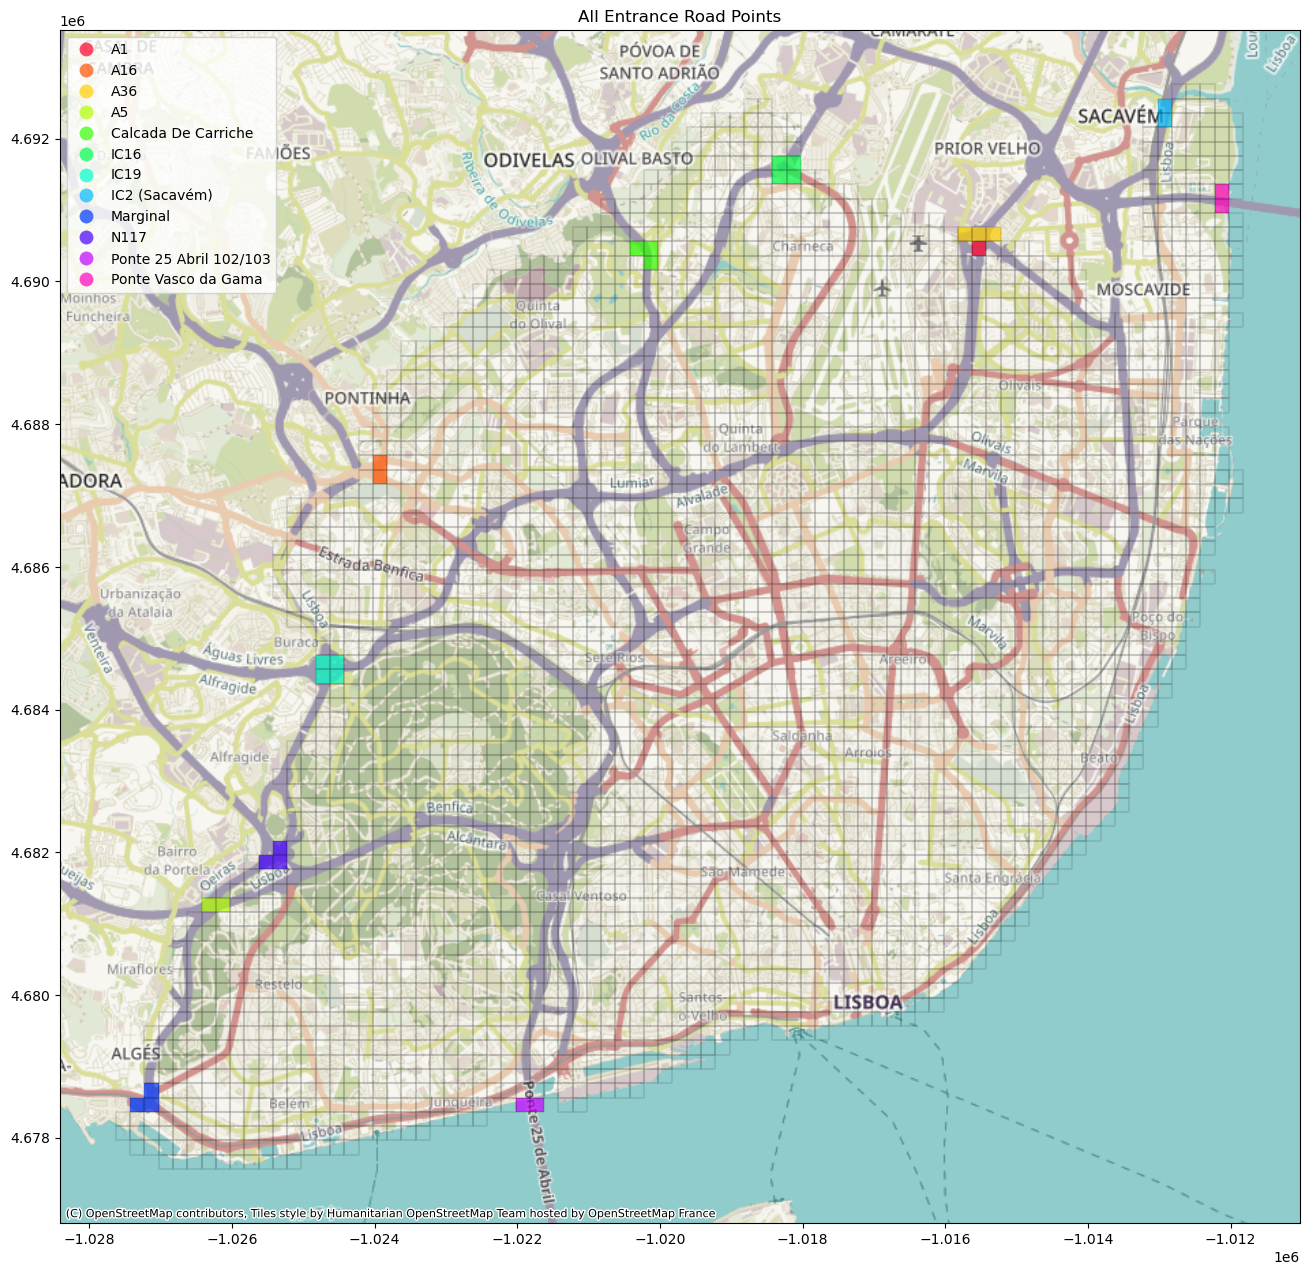

In [5]:
import contextily as ctx
from matplotlib import colormaps as cm

def assign_street_name(grid_id):
    for street, grid_ids in cml.street_names.items():
        if grid_id in grid_ids:
            return street
    return None

def cmap_to_dict(cmap, categories):
    return {category: cmap(i) for category, i in zip(categories, np.linspace(0, 1, len(categories)))}

grids_geo['street_name'] = grids_geo.index.map(assign_street_name)
grids_geo['street_name'] = grids_geo['street_name'].astype('category')
main_streets_grids_geo = grids_geo[grids_geo.street_name.notna()]
streets_cmap_name = 'gist_rainbow'
streets_cmap = cm.get_cmap(streets_cmap_name)
streets_cmap_dict = cmap_to_dict(streets_cmap, main_streets_grids_geo.street_name.cat.categories)

all_streets_ax = grids_geo.boundary.plot(color='black', alpha=0.1, figsize=(16, 16))
all_streets_ax.set_title('All Entrance Road Points')
ctx.add_basemap(all_streets_ax, crs=grids_geo.crs.to_string())
main_streets_grids_geo.plot(ax=all_streets_ax, column='street_name', legend=True, legend_kwds={'loc': 'upper left'}, alpha=0.7, cmap=streets_cmap_name)

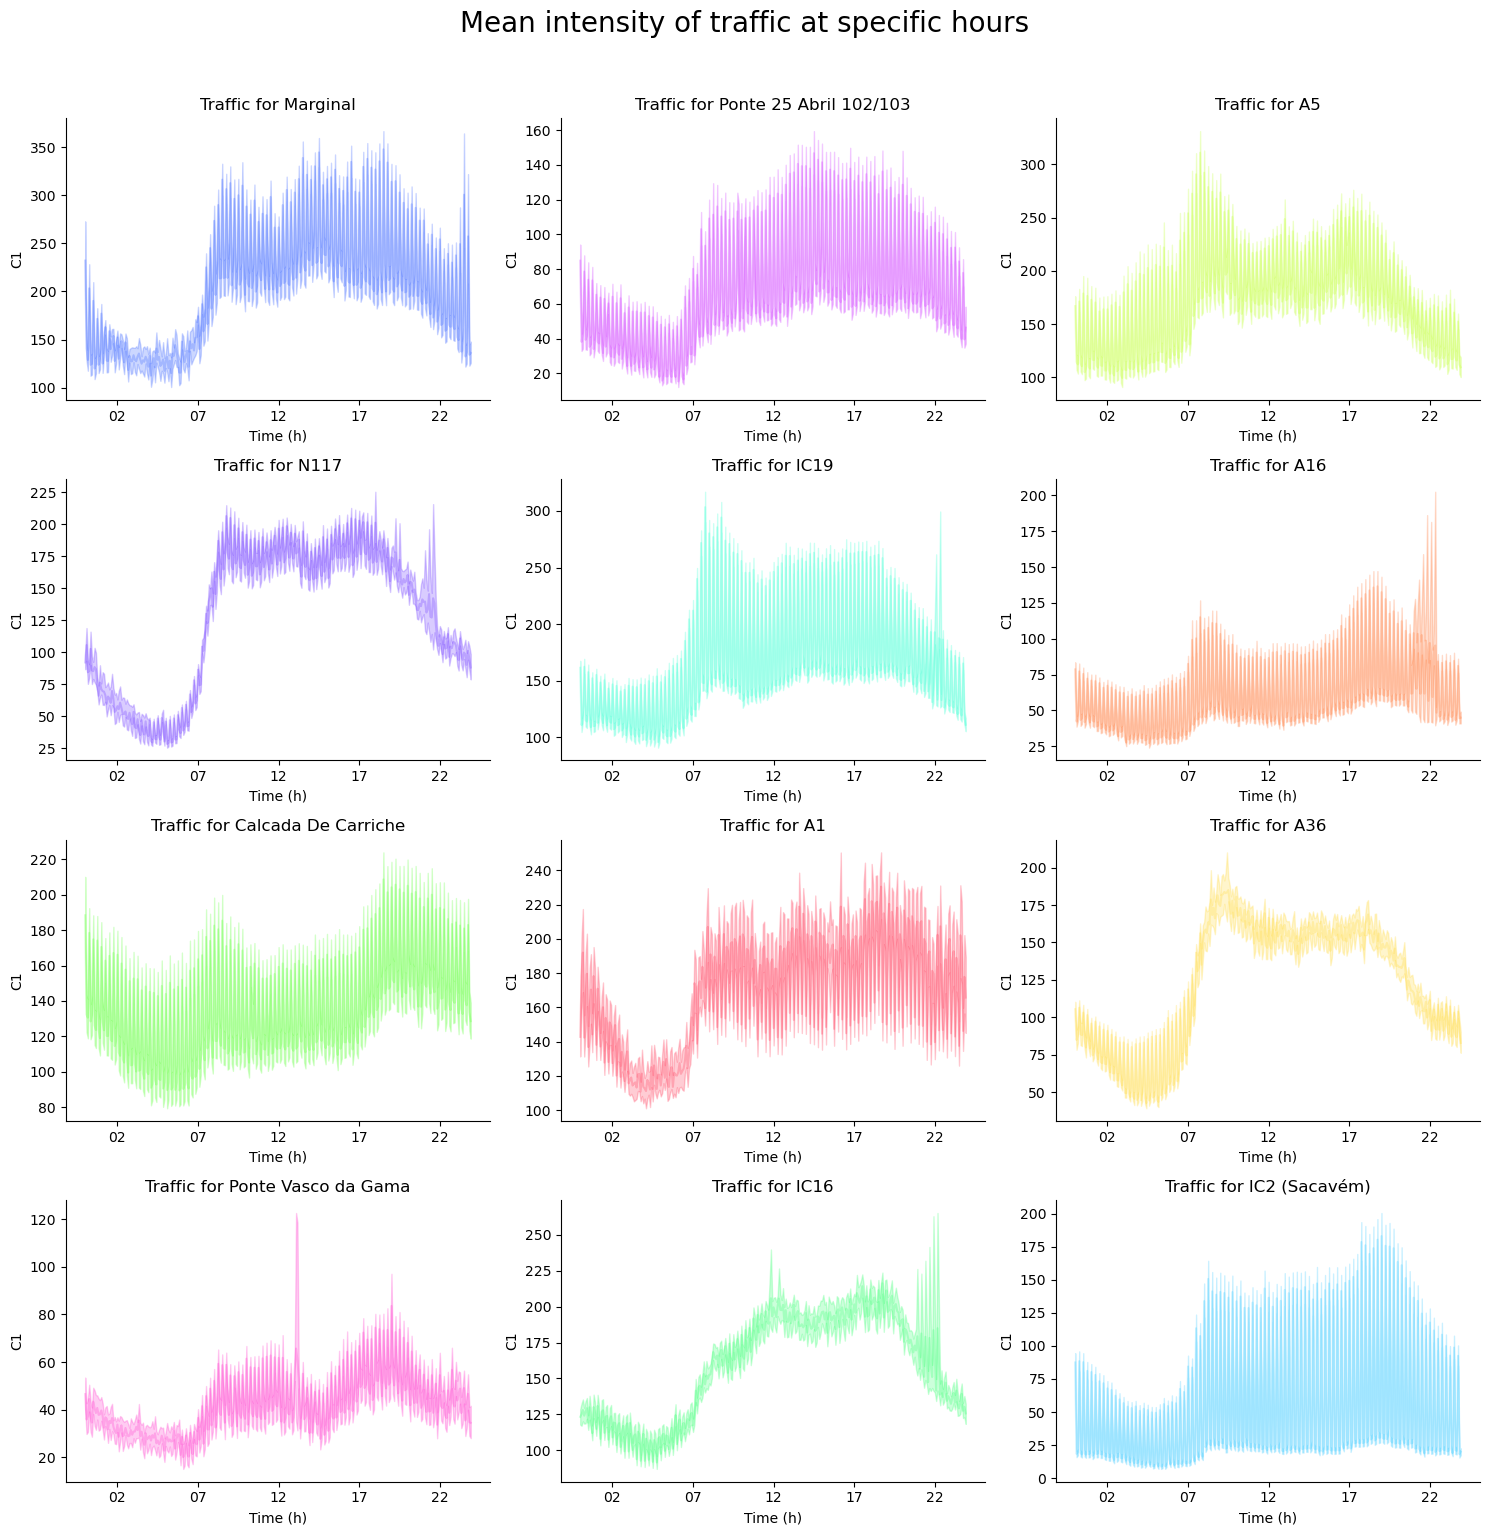

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


# april_2022_df = entrance_roads_df[np.logical_and(entrance_roads_df.Datetime.dt.month == 4, entrance_roads_df.Datetime.dt.year == 2022)].copy()
entrance_roads_df['street_name'] = entrance_roads_df.Grid_ID.map(assign_street_name)
entrance_roads_df['hour'] = entrance_roads_df.Datetime.dt.hour
entrance_roads_df['minute'] = entrance_roads_df.Datetime.dt.minute

# Get unique street names
street_names = entrance_roads_df['street_name'].unique()
num_subplots = len(street_names)
num_rows = num_subplots // 3 + (num_subplots % 3 > 0)
num_cols = min(num_subplots, 3)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
fig.suptitle('Mean intensity of traffic at specific hours', fontsize=20, y=1.02)

# Plot separately for each street name
for ax, street_name in zip(axes.flatten(), street_names):
    street_df = entrance_roads_df[entrance_roads_df['street_name'] == street_name].copy()
    street_df.set_index('Datetime', inplace=True)
    # street_df = street_df.resample('15T')[['C1']].mean()
    street_df['time'] = pd.to_datetime(street_df.index.time, format='%H:%M:%S')
    sns.lineplot(x='time', y='C1', data=street_df, legend=True, c=streets_cmap_dict[street_name], ax=ax, alpha=0.2)
    ax.set_xlabel('Time (h)')
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=5))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
    sns.despine()
    ax.set_title(f'Traffic for {street_name}')

plt.tight_layout()
plt.show()

We can notice that the number of terminals at specific hours has mostly low standard deviation. From that point we can observe some basic patterns and common characteristics for every street entrance. As could be predicted, we observe lowest traffic intensity at night (2:00am - 6:00am), but it is important to notice that traffic is not even close to zero. This can be caused by size of the girds, which can contain living areas. For better comparison of roads we should bring them to the same level of traffic at night or create plot of grow and decrease.

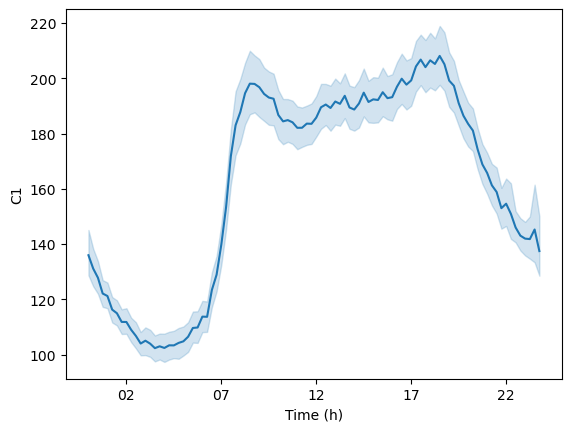

In [7]:
entrance_roads_df.set_index(['Datetime'], inplace=True)
entrance_roads_resampled_df = entrance_roads_df.resample('15T')[['C1']].mean()
entrance_roads_df.reset_index(inplace=True)
entrance_roads_resampled_df['time'] = pd.to_datetime(entrance_roads_resampled_df.index.time, format='%H:%M:%S')
ax = sns.lineplot(x=entrance_roads_resampled_df.time, y=entrance_roads_resampled_df.C1, legend=True)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax.set_xlabel('Time (h)')
plt.show()

From summary plot of all entrance roads we can observe a traffic pattern at specific hours. We can now clearly say that the traffic is the lowest at night and the highest at 8:00am and 5:00pm. This is caused by the fact that people are going to work and back home. We can also notice that the traffic is higher at  8:00am than at 5:00pm. This is caused by the fact that people ussualy go to work at same time, but they are going back home at the different hours.

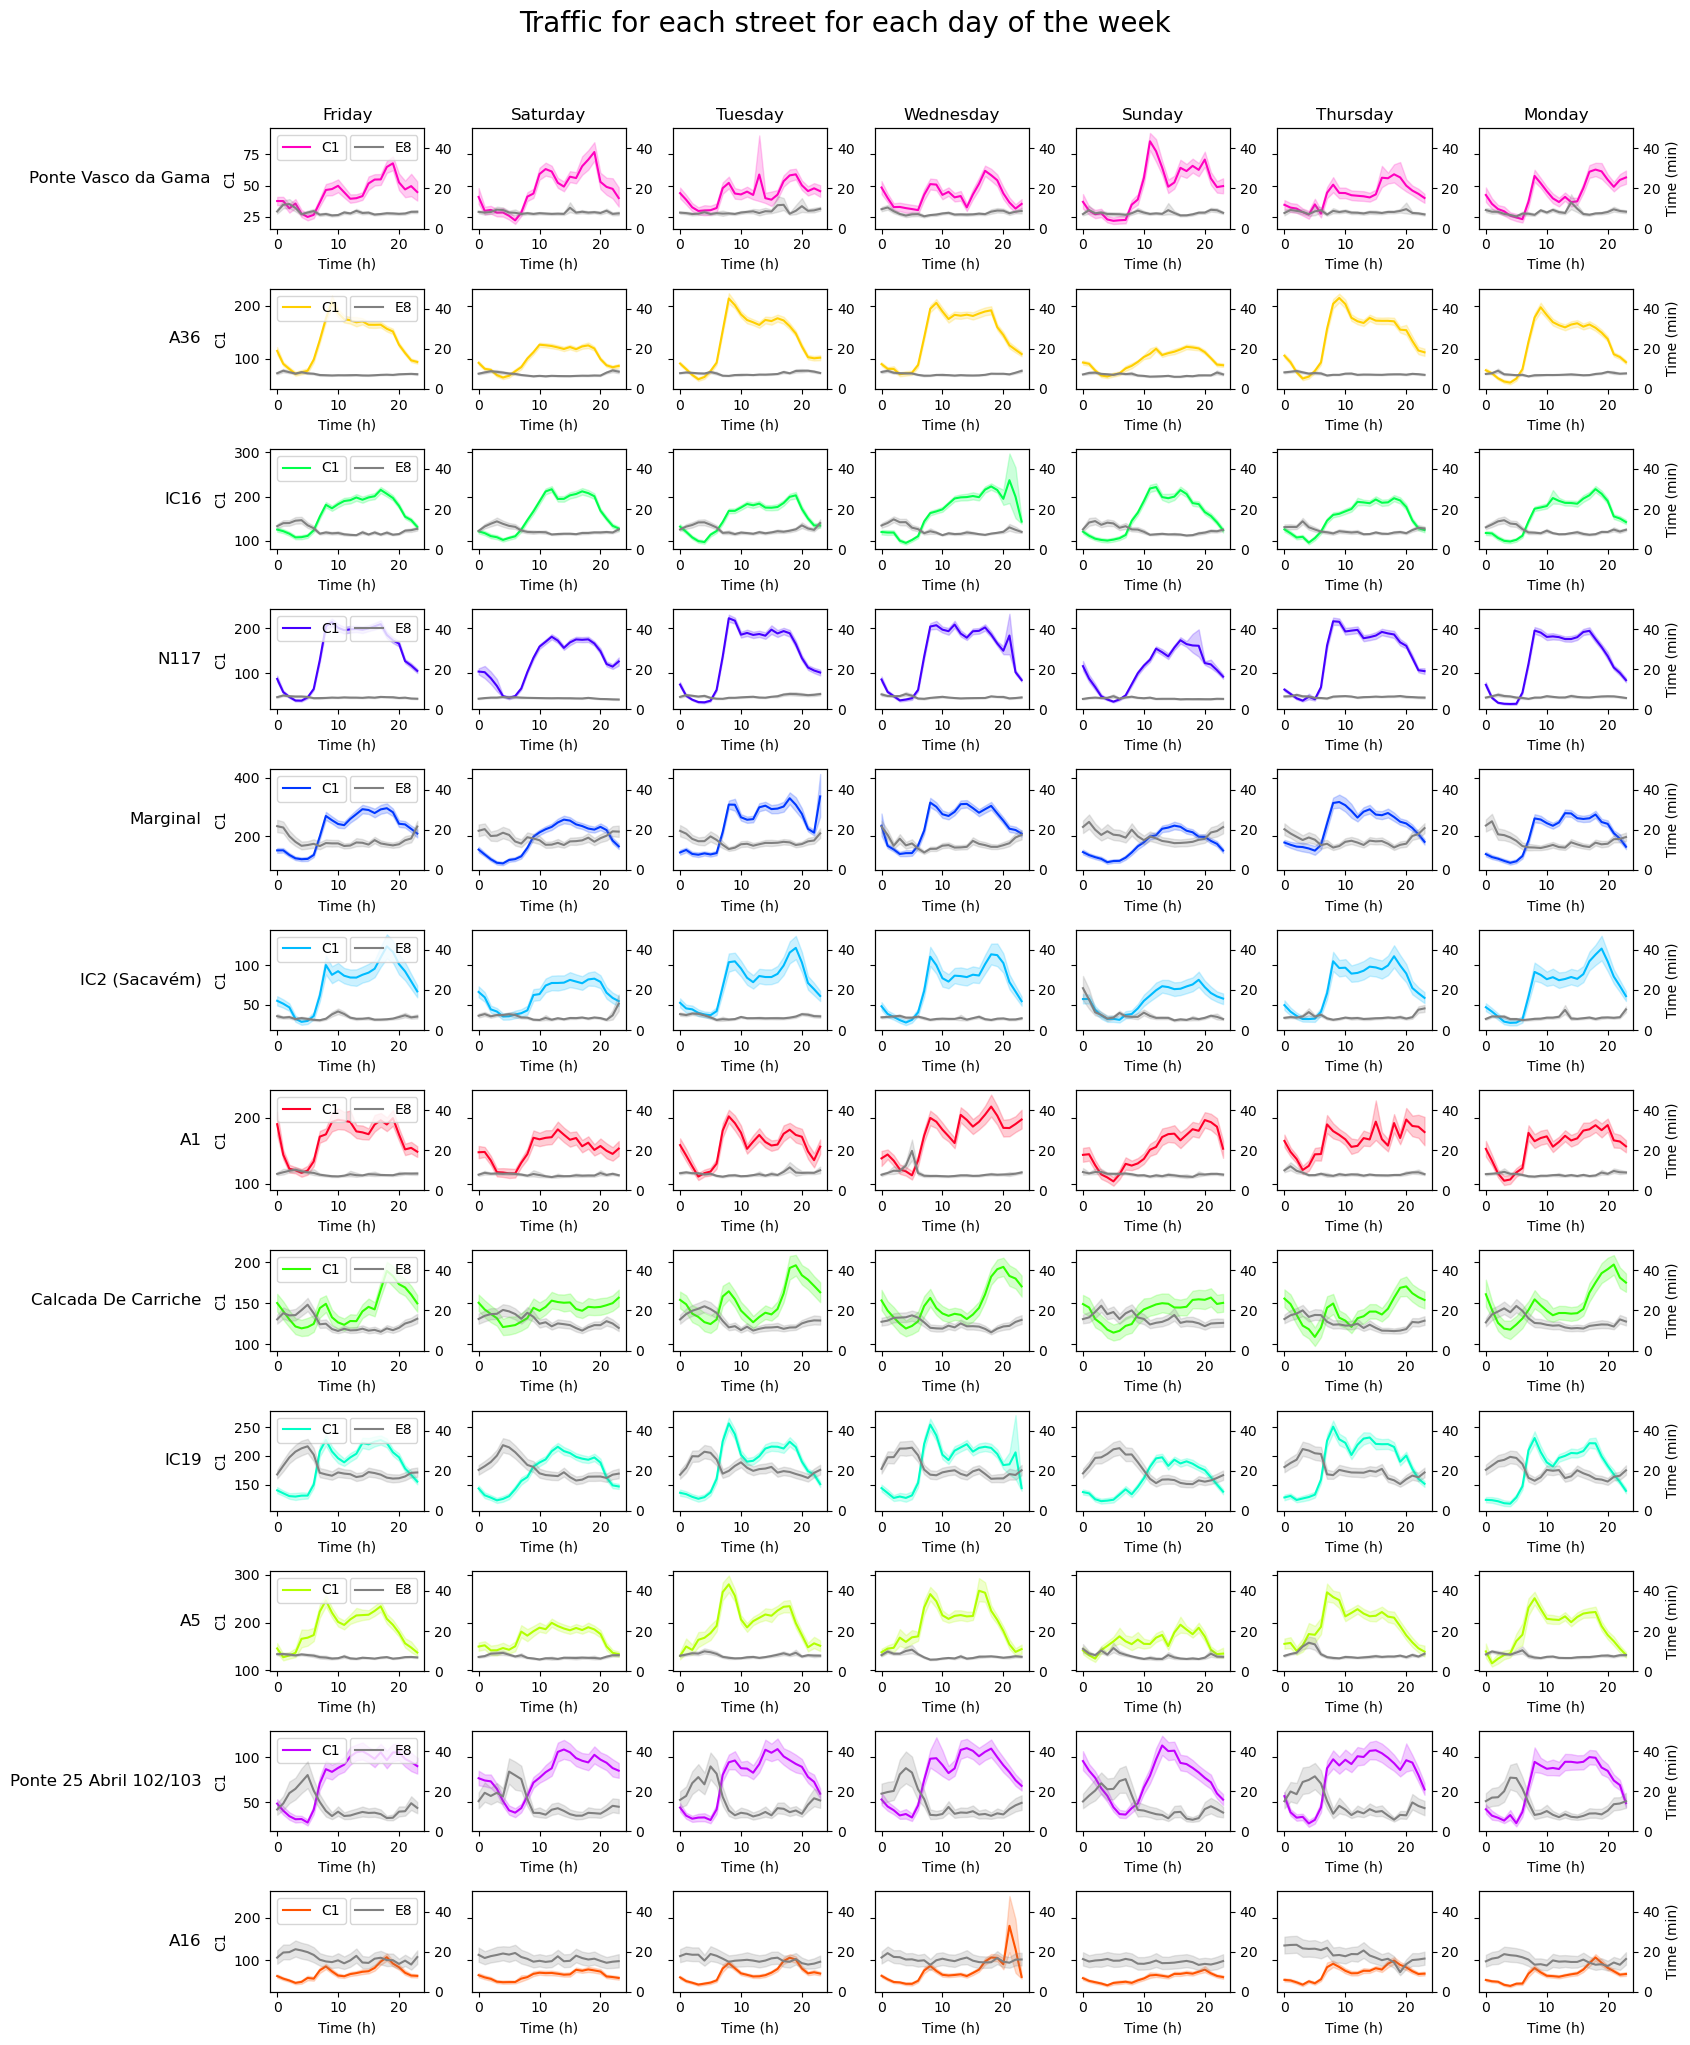

In [8]:
streets_num = len(cml.street_names.keys())
fig, axes = plt.subplots(streets_num, 7, figsize=(17, 20), sharey='row')
entrance_roads_df['day_of_week'] = entrance_roads_df.Datetime.dt.day_name()
entrance_roads_df['hour'] = entrance_roads_df.Datetime.dt.hour
all_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week_days = list(entrance_roads_df.day_of_week.unique())
week_days.append(week_days.pop(0))
fig.suptitle('Traffic for each street for each day of the week', fontsize=20, y=1.02)
week_days.sort(key=all_days.index)
for i, ax in enumerate(axes[0]):
    ax.set_title(week_days[i])

for i, ax in enumerate(axes[:, 0]):
    street_name = list(cml.street_names.keys())[i]
    ax.annotate(street_name, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

for i, street_name in enumerate(cml.street_names):
    street_df = entrance_roads_df[entrance_roads_df.street_name == street_name].copy()

    for j, day_of_week in enumerate(week_days):
        street_day_df = street_df[(street_df.day_of_week == day_of_week)].copy()
        ax = axes[i, j]
        street_day_df['C2_pow'] = pow(street_day_df.C2, 1.5)
        sns.lineplot(x=street_day_df.Datetime.dt.hour, y='C1', data=street_day_df, ax=ax, c=streets_cmap_dict[street_name])
        ax.set_xlabel('Time (h)')

        ax2 = ax.twinx()
        ax2.set_ylim(0, 50)
        sns.lineplot(x=street_day_df.Datetime.dt.hour, y='E8', data=street_day_df, ax=ax2, c='gray')

        if j == 0:
            ax.legend(['C1'], loc='upper left')
            ax2.legend(['E8'], loc='upper right')

        if j != len(week_days) - 1:
            ax2.set_ylabel('')
        else:
            ax2.set_ylabel('Time (min)')
plt.tight_layout()
plt.show()

- C1 - Number of distinct terminals in the grid
- E8 - Average duration of stay within the grid

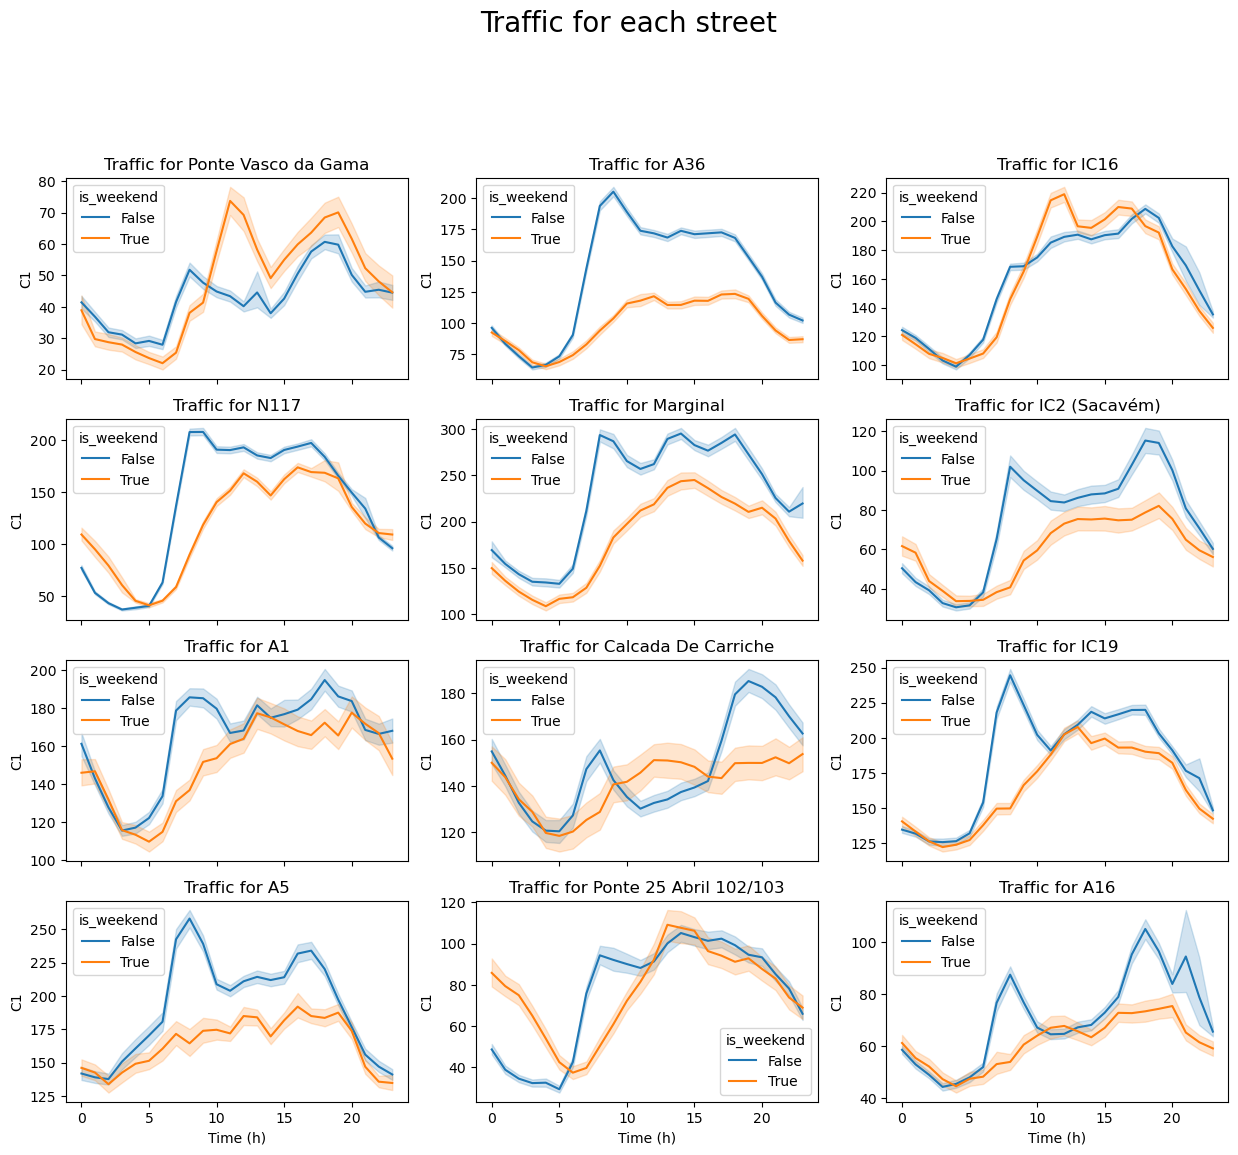

In [10]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12), sharex=True)
fig.suptitle('Traffic for each street', fontsize=20, y=1.02)
for ax, street_name in zip(axes.flatten(), cml.street_names):
    street_df = entrance_roads_df[entrance_roads_df.street_name == street_name].copy()
    street_df['is_weekend'] = street_df.day_of_week.isin(['Saturday', 'Sunday'])
    sns.lineplot(x=street_df.Datetime.dt.hour, y='C1', data=street_df, ax=ax, hue='is_weekend', legend=True)
    ax.set_title(f'Traffic for {street_name}')
    ax.set_xlabel('Time (h)')

Working days traffic intensity has mostly two pikes as we saw in previous patterns. On the other hand we can observe that traffic intensity on weekends is more even, it also grows slower at morning. We can also notice that mostly traffic intensity on weekends is lower than on working days. But we have to keep in mind that we are looking at the average value of traffic intensity. It can be caused by the fact that people are going to work and back home at the same time, but on weekends they are going to different places at different times. But nothing is the same and we can observe some exceptions.
- Ponte Vasco da Gamma - has higher traffic intensity on weekends than on working days, but also it has two peaks after morning. It can be caused by the fact that it is a bridge and people are going to the beaches on weekends.
- IC16 - has higher traffic intensity on weekends than on working days. This can be caused by the fact that it is a popular way to go for some weekend places.
- Marginal - has a weird peak before the down at 4am.
- Ponte 25 Abril 102/103 - has higher traffic intensity at night than on working days. This can be popular night are with bars and clubs.